In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = '/content/drive/MyDrive/household_power_consumption.txt'
data = pd.read_csv(file_path, sep=';', low_memory=False)

In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# Merging date and time to the same column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')


In [ ]:
data.drop(columns=['Date', 'Time'], inplace=True)

In [ ]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [ ]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Convert columns to numeric (forcing errors to NaN)
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')


In [ ]:
data[cols].isnull().sum()

,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [ ]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [ ]:
# Removing empty rows
data_cleaned = data.dropna()
print(f"Number of rows remaining after dropping NaNs: {data_cleaned.shape[0]}")
data_cleaned.head()

Number of rows remaining after dropping NaNs: 2049280


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [ ]:
# Checking duplicate rows
duplicate_count = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


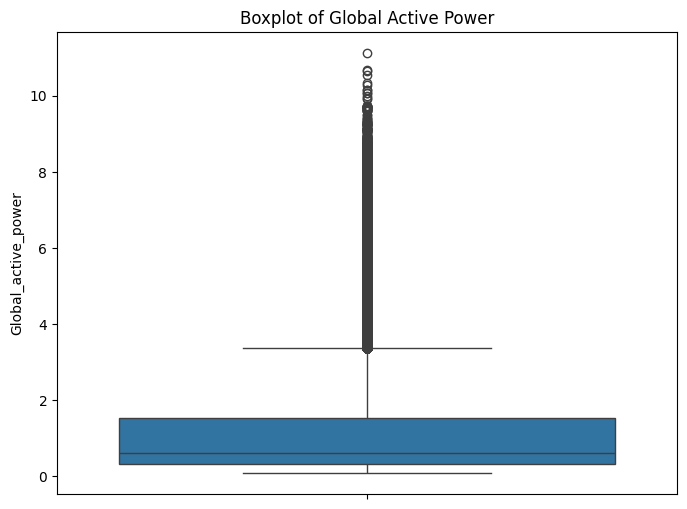

count    2.049280e+06
mean     1.091615e+00
std      1.057294e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.020000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize outliers in Global_active_power
plt.figure(figsize=(8,6))
sns.boxplot(data_cleaned['Global_active_power'])
plt.title('Boxplot of Global Active Power')
plt.show()

# Summary statistics for Global_active_power
print(data_cleaned['Global_active_power'].describe())


In [ ]:
data_cleaned = data_cleaned[data_cleaned['Global_active_power'] <= 4]


print(f"Number of rows after removing outliers: {data_cleaned.shape[0]}")
print(data_cleaned['Global_active_power'].describe())


Number of rows after removing outliers: 2002239
count    2.002239e+06
mean     1.000879e+00
std      8.761529e-01
min      7.600000e-02
25%      3.060000e-01
50%      5.600000e-01
75%      1.490000e+00
max      4.000000e+00
Name: Global_active_power, dtype: float64


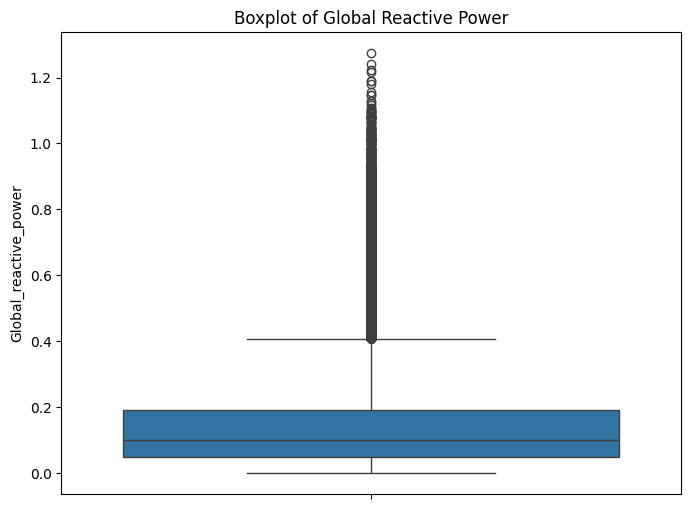

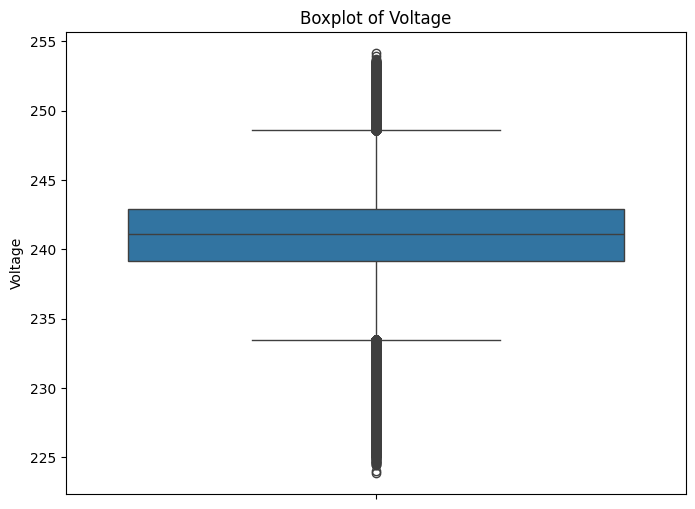

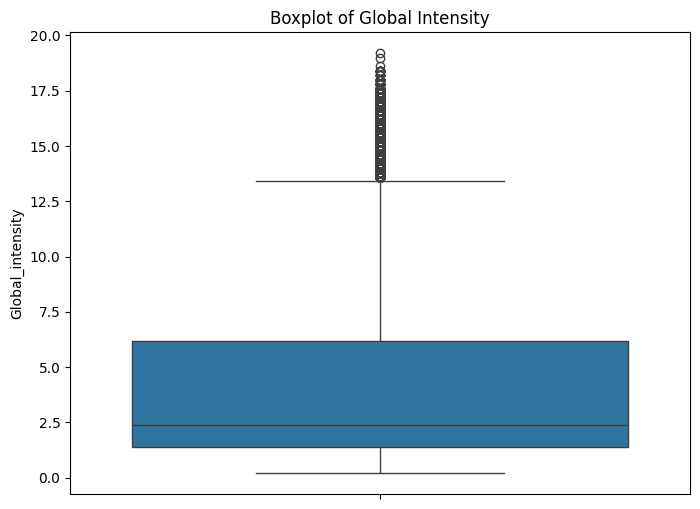

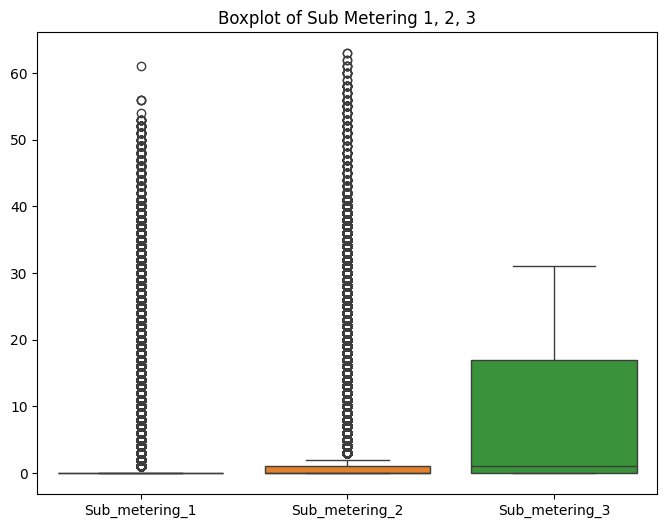

In [ ]:


# Global Reactive Power
plt.figure(figsize=(8,6))
sns.boxplot(data_cleaned['Global_reactive_power'])
plt.title('Boxplot of Global Reactive Power')
plt.show()

# Voltage
plt.figure(figsize=(8,6))
sns.boxplot(data_cleaned['Voltage'])
plt.title('Boxplot of Voltage')
plt.show()

# Global Intensity
plt.figure(figsize=(8,6))
sns.boxplot(data_cleaned['Global_intensity'])
plt.title('Boxplot of Global Intensity')
plt.show()

# Sub_metering_1, Sub_metering_2, Sub_metering_3
plt.figure(figsize=(8,6))
sns.boxplot(data_cleaned[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
plt.title('Boxplot of Sub Metering 1, 2, 3')
plt.show()


In [ ]:
# Removing outliers
data_cleaned = data_cleaned[
    (data_cleaned['Global_reactive_power'] <= 0.4) &
    (data_cleaned['Global_intensity'] <= 12) &
    (data_cleaned['Voltage'] >= 235) & (data_cleaned['Voltage'] <= 250) &
    (data_cleaned['Sub_metering_1'] <= 50) &
    (data_cleaned['Sub_metering_2'] <= 50)
]


print(f"Number of rows after removing outliers: {data_cleaned.shape[0]}")
print(data_cleaned.describe())

Number of rows after removing outliers: 1808439
       Global_active_power  Global_reactive_power       Voltage  \
count         1.808439e+06           1.808439e+06  1.808439e+06   
mean          8.626616e-01           1.125044e-01  2.413817e+02   
min           7.600000e-02           0.000000e+00  2.350000e+02   
25%           2.980000e-01           4.600000e-02  2.395900e+02   
50%           4.740000e-01           9.600000e-02  2.413300e+02   
75%           1.416000e+00           1.820000e-01  2.431000e+02   
max           2.992000e+00           4.000000e-01  2.500000e+02   
std           7.032002e-01           9.600082e-02  2.710369e+00   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      1.808439e+06    1.808439e+06    1.808439e+06    1.808439e+06   
mean       3.648509e+00    2.281929e-01    5.959051e-01    5.725569e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.200000e+00    0.000000e+00    0.000

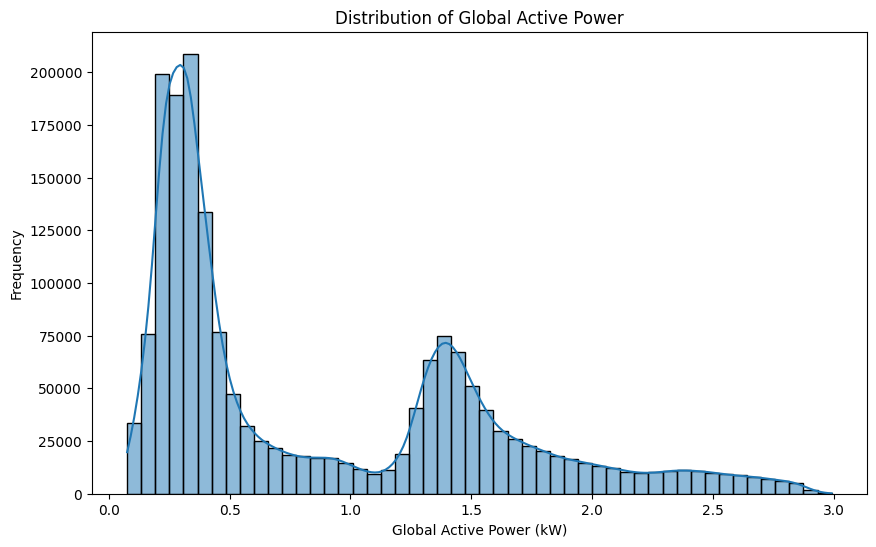

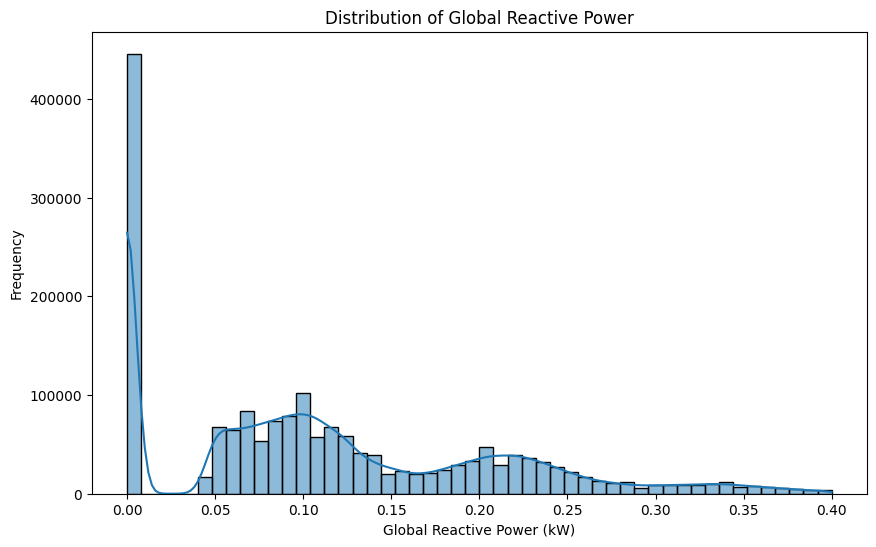

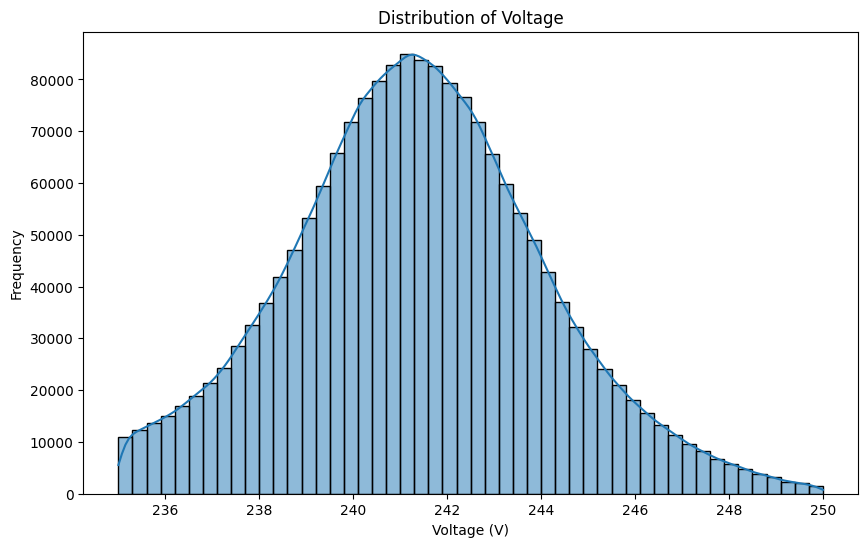

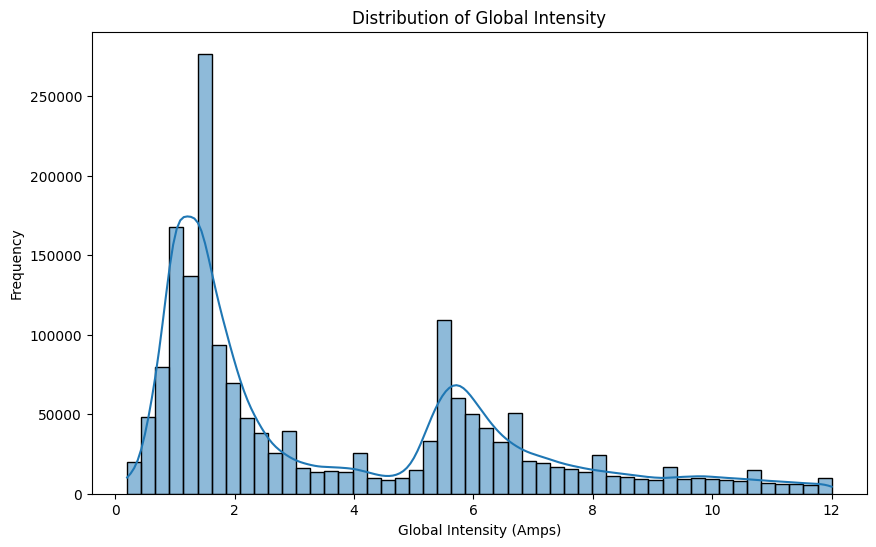

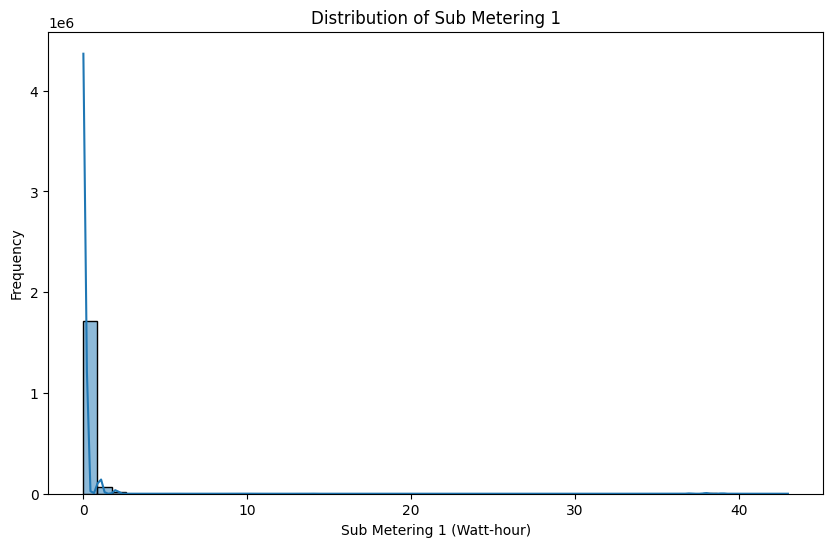

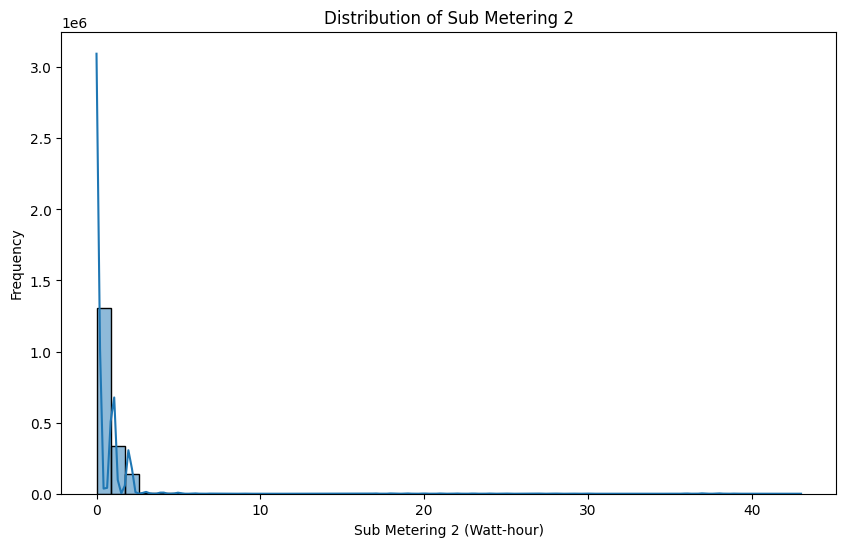

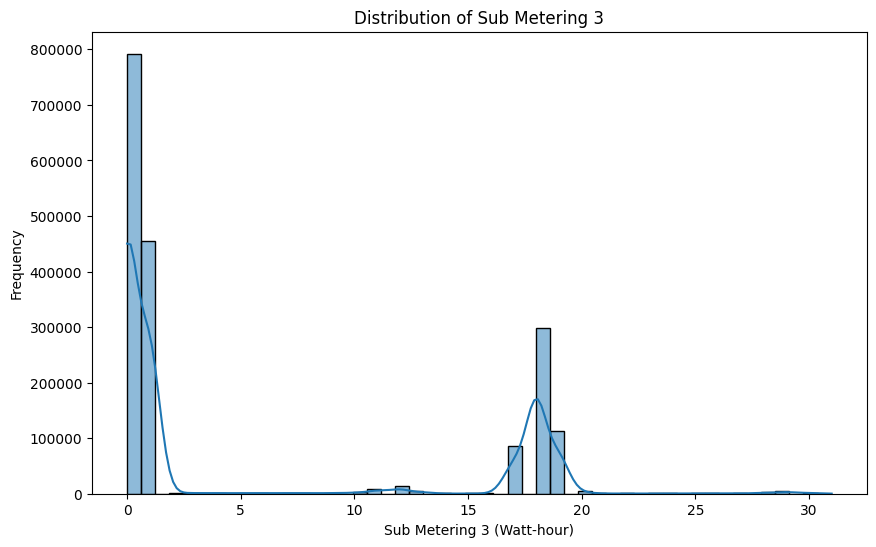

In [ ]:


# Distribution plots for key variables

# Global Active Power
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.show()

# Global Reactive Power
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Global_reactive_power'], bins=50, kde=True)
plt.title('Distribution of Global Reactive Power')
plt.xlabel('Global Reactive Power (kW)')
plt.ylabel('Frequency')
plt.show()

# Voltage
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Voltage'], bins=50, kde=True)
plt.title('Distribution of Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency')
plt.show()

# Global Intensity
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Global_intensity'], bins=50, kde=True)
plt.title('Distribution of Global Intensity')
plt.xlabel('Global Intensity (Amps)')
plt.ylabel('Frequency')
plt.show()

# Sub Metering 1
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Sub_metering_1'], bins=50, kde=True)
plt.title('Distribution of Sub Metering 1')
plt.xlabel('Sub Metering 1 (Watt-hour)')
plt.ylabel('Frequency')
plt.show()

# Sub Metering 2
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Sub_metering_2'], bins=50, kde=True)
plt.title('Distribution of Sub Metering 2')
plt.xlabel('Sub Metering 2 (Watt-hour)')
plt.ylabel('Frequency')
plt.show()

# Sub Metering 3
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Sub_metering_3'], bins=50, kde=True)
plt.title('Distribution of Sub Metering 3')
plt.xlabel('Sub Metering 3 (Watt-hour)')
plt.ylabel('Frequency')
plt.show()


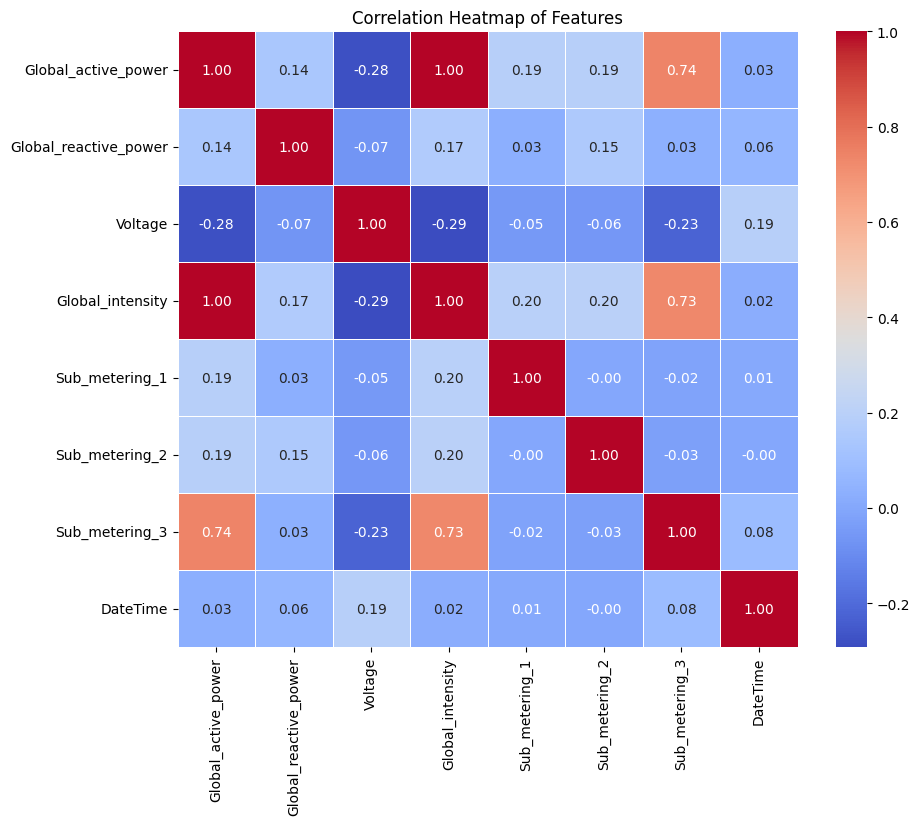

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr_matrix = data_cleaned.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


The correlation heatmap reveals several important relationships between the variables. Global_active_power and Global_intensity are almost perfectly correlated (correlation = 1.00), indicating redundancy, so one of these variables—likely Global_intensity—can be dropped from the model to avoid multicollinearity. There is also a strong correlation between Global_active_power and Sub_metering_3 (correlation = 0.74), suggesting that the appliances measured by this meter (such as water heaters or air conditioners) significantly contribute to overall power usage.